# Part 2: Full Data Workflow A-Z

## Merging, Joining and Concatenating DataFrames

### Adding / Concatenating Rows (Part 1)

In [ ]:
import pandas as pd

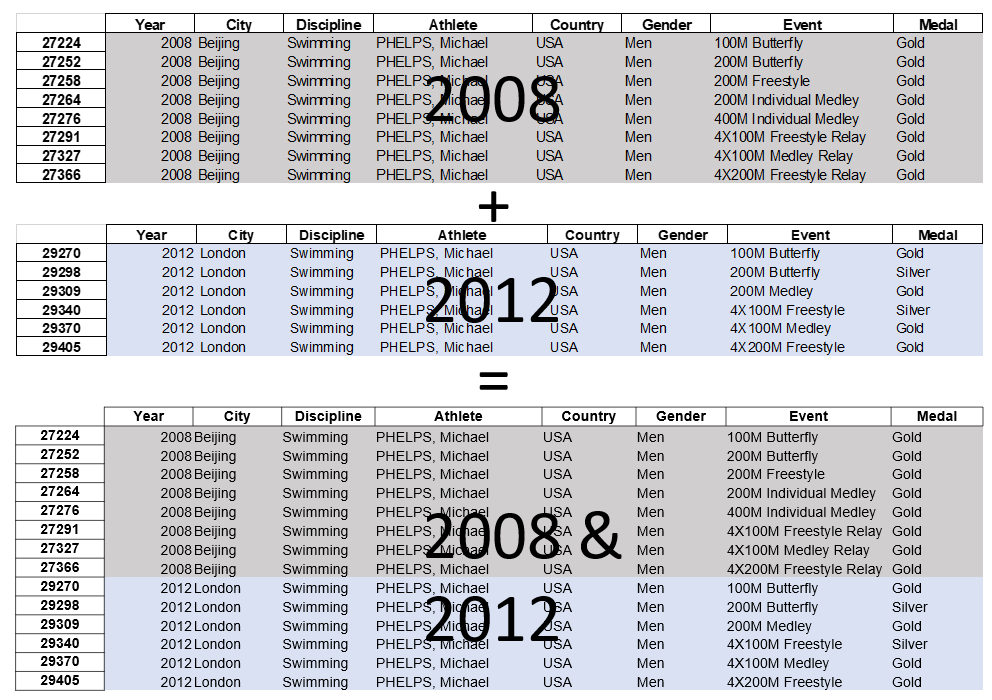

In [ ]:
men2004 = pd.read_csv("men2004.csv")

In [ ]:
men2004

In [ ]:
men2008 = pd.read_csv("men2008.csv")

In [ ]:
men2008

In [ ]:
#men2004.append(men2008, ignore_index= True) # old

In [ ]:
men0408 = pd.concat([men2004, men2008], ignore_index=False, keys = [2004, 2008], names = ["Year"]) # new

In [ ]:
men0408 

In [ ]:
men0408.reset_index().drop(columns = "level_1")

### Adding / Concatenating Rows (Part 2)

In [ ]:
men2004.head()

In [ ]:
men2008.head()

In [ ]:
men2004.columns =["Name", "Medals"]

In [ ]:
men2004["Success"] = "Yes"

In [ ]:
men2004

In [ ]:
pd.concat([men2004, men2008], keys = [2004, 2008], names = ["Year"])

In [ ]:
men2004.drop(labels = ["Success"], axis = 1, inplace = True)

In [ ]:
men2004

In [ ]:
men2008.columns = men2004.columns

In [ ]:
men2008.head()

In [ ]:
pd.concat([men2004, men2008], keys = [2004, 2008], names = ["Year"])

In [ ]:
men2004 = pd.read_csv("men2004.csv", index_col = "Athlete")
men2008 = pd.read_csv("men2008.csv", index_col = "Athlete")

In [ ]:
men2004.head()

In [ ]:
men2008.head()

In [ ]:
pd.concat([men2004, men2008], ignore_index= False, keys = [2004, 2008])

### Arithmetic between Pandas Objects / Data Alignment

In [ ]:
import pandas as pd

In [ ]:
topfive_2004 = pd.read_csv("topfive_2004.csv", index_col="Athlete")
topfive_2008 = pd.read_csv("topfive_2008.csv", index_col="Athlete")

In [ ]:
topfive_2004

In [ ]:
topfive_2008

In [ ]:
topfive_2004 + topfive_2008

In [ ]:
topfive_2004.add(topfive_2008, fill_value= 0)

In [ ]:
topfive_2008.rename(columns = {"bronze":"Bronze"}, inplace = True)

In [ ]:
topfive_2004.add(topfive_2008, fill_value= 0)

In [ ]:
topfive_2004.sub(topfive_2008, fill_value= 0)

### Outer Join

In [ ]:
import pandas as pd

In [ ]:
men2004 = pd.read_csv("men2004.csv")
men2008 = pd.read_csv("men2008.csv")

In [ ]:
men2004.head()

In [ ]:
men2004.shape

In [ ]:
men2008.head()

In [ ]:
men2008.shape

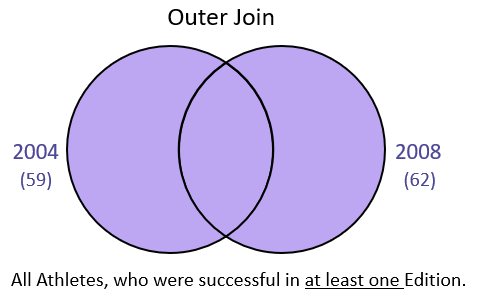

In [ ]:
len(men2008) + len(men2004)

In [ ]:
men2004.merge(men2008, how = "outer", on = "Athlete", suffixes= ("_2004", "_2008"), indicator= True )

In [ ]:
men0408 = men2004.merge(men2008, how = "outer", on = "Athlete", suffixes= ("_2004", "_2008"), indicator= True )

In [ ]:
men0408._merge.value_counts()

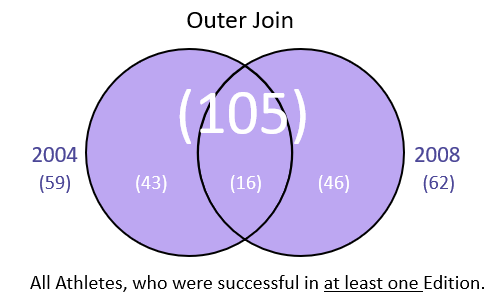

### Inner Join

In [ ]:
men2004.head()

In [ ]:
men2008.head()

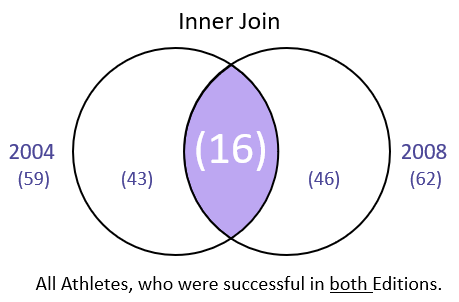

In [ ]:
men2004.merge(men2008, how = "inner", on = "Athlete", suffixes= ("_2004", "_2008"), indicator= True )

### Outer Join without Intersection

In [ ]:
men2004.head()

In [ ]:
men2008.head()

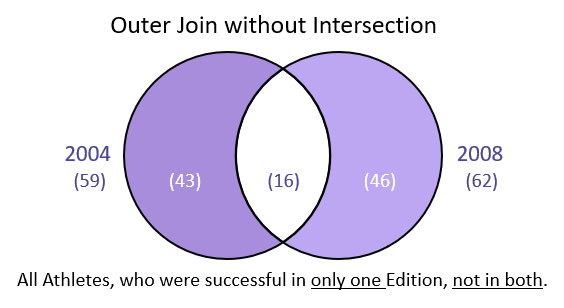

In [ ]:
men0408= men2004.merge(men2008, how = "outer", on = "Athlete", suffixes= ("_2004", "_2008"), indicator= True )

In [ ]:
men0408.loc[men0408._merge != "both"]

### Left Join without Intersection

In [ ]:
men2004.head()

In [ ]:
men2008.head()

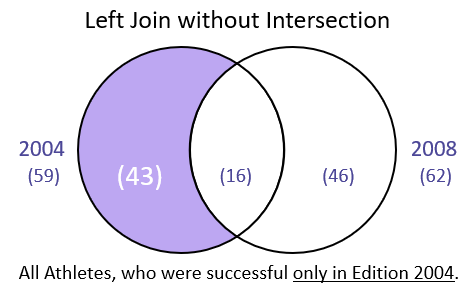

In [ ]:
men0408 = men2004.merge(men2008, how = "outer", on = "Athlete", suffixes= ("_2004", "_2008"), indicator= True )

In [ ]:
men0408.head()

In [ ]:
men0408[men0408._merge == "left_only"].shape

### Right Join without Intersection

In [ ]:
men2004.head()

In [ ]:
men2008.head()

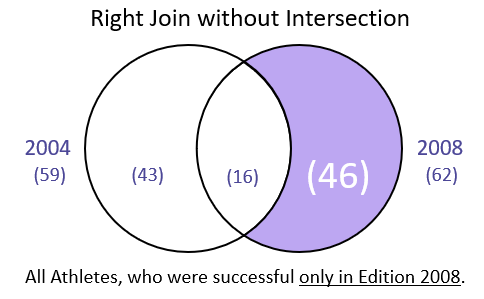

In [ ]:
men0408 =  men2004.merge(men2008, how = "outer", on = "Athlete", suffixes = ["_2004", "_2008"], indicator = True)

In [ ]:
men0408[men0408._merge == "right_only"].shape

### Left Join

In [ ]:
men2004.head()

In [ ]:
men2008.head()

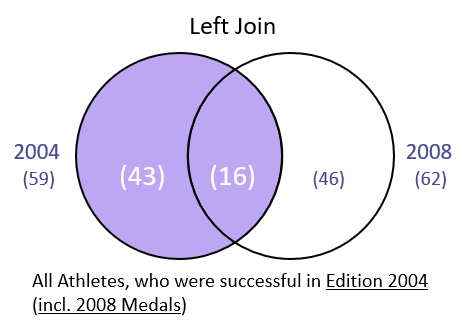

In [ ]:
men2004.merge(men2008, how = "left", on = "Athlete", suffixes = ["_2004", "_2008"], indicator = True)

### Right Join

In [ ]:
men2004.head()

In [ ]:
men2008.head()

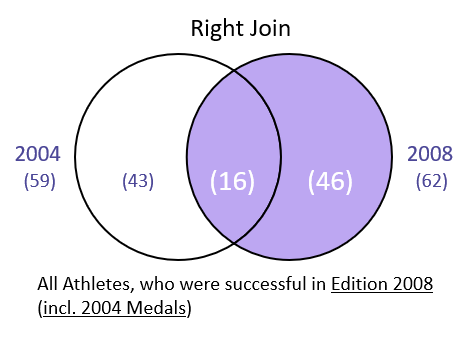

In [ ]:
men2004.merge(men2008, how = "right", on = "Athlete", suffixes = ["_2004", "_2008"], indicator = True)

### Joining on different Column Labels & Indexes

In [ ]:
import pandas as pd

In [ ]:
men2004 = pd.read_csv("men2004.csv")
men2008 = pd.read_csv("men2008.csv")

In [ ]:
men2004.head()

In [ ]:
men2008.head()

In [ ]:
men2004.columns = ["Name", "Medals"]

In [ ]:
men2004.head()

In [ ]:
men0408 = men2004.merge(men2008, how = "outer", left_on = "Name", right_on = "Athlete",
                      suffixes = ["_2004", "_2008"], indicator = True)

In [ ]:
men0408

In [ ]:
men0408.Name.fillna(men0408.Athlete, inplace = True)

In [ ]:
men0408.drop(["Athlete", "_merge"], axis = 1, inplace = True)

In [ ]:
men2004.head()

In [ ]:
men2008.set_index("Athlete", inplace = True)

In [ ]:
men2008.head()

In [ ]:
men2004.merge(men2008, how = "outer", left_on= "Name", right_index = True,
              suffixes = ["_2004", "_2008"], indicator = True)

### Joining on many Columns

In [ ]:
import pandas as pd

In [ ]:
men2004_det = pd.read_csv("men2004_det.csv")
men2008_det = pd.read_csv("men2008_det.csv")

In [ ]:
men2004_det.head(10)

In [ ]:
men2008_det.head(10)

In [ ]:
men2004_det.loc[men2004_det.Athlete == "PHELPS, Michael"]

In [ ]:
men2008_det.loc[men2008_det.Athlete == "PHELPS, Michael"]

In [ ]:
men0408 = men2004_det.merge(men2008_det, how = "inner", on = ["Athlete", "Medal"], suffixes= ("_2004", "_2008"))

In [ ]:
men0408.loc[men0408.Athlete == "PHELPS, Michael"]

### pd.merge and join()

In [ ]:
import pandas as pd

In [ ]:
men2004 = pd.read_csv("men2004.csv", index_col = "Athlete")
men2008 = pd.read_csv("men2008.csv", index_col = "Athlete")

In [ ]:
men2004.head()

In [ ]:
men2008.head()

In [ ]:
men2004.merge(men2008, how = "outer", on = "Athlete", suffixes= ("_2004", "_2008"), indicator= True)

In [ ]:
pd.merge(men2004, men2008, how ="outer", on = "Athlete", suffixes= ("_2004", "_2008"), indicator= True )

In [ ]:
men2004.join(men2008, how = "outer", lsuffix = "_2004", rsuffix = "_2008")